In [42]:
import numpy as np
from pathlib import Path
import time
import matplotlib.pyplot as plt
start_time = time.time()

import xobjects as xo
import xtrack as xt
import xpart as xp
import xobjects as xo
import xcoll as xc

# import apertls
from matplotlib.colors import LogNorm

import gzip
from typing import Union

import awkward as ak
import pandas as pd
import re

In [112]:
line = xt.Line.from_json('../injection_lines/sps_with_aperture_inj_q20_beam_sagitta.json')

Loading line from dict:   0%|          | 0/36381 [00:00<?, ?it/s]

Done loading line from dict.           


In [113]:
env = line.env

line['bump.11207'] = 0
line['bump.11407'] = 0
line['bump.11607'] = 0
line['bump.12207'] = 0

line.ref['mdh.11207'].knl[0] += line.vars['bump.11207']
line.ref['mdh.11407'].knl[0] += line.vars['bump.11407']
line.ref['mdh.11607'].knl[0] += line.vars['bump.11607']
line.ref['mdh.12207'].knl[0] += line.vars['bump.12207']

In [114]:
#fix of tidp drift for later insertion of collimator
tt = line.get_table()
tw = line.twiss()
s_start_tidp = line.get_s_position('tidp.11434..0')
line.remove(tt.rows['tidp.*'].name)
line.insert(env.place('tidp.11434', at=s_start_tidp), s_tol=1e-6)

Slicing line:   0%|          | 0/75278 [00:00<?, ?it/s]

In [115]:
tw = line.twiss4d()

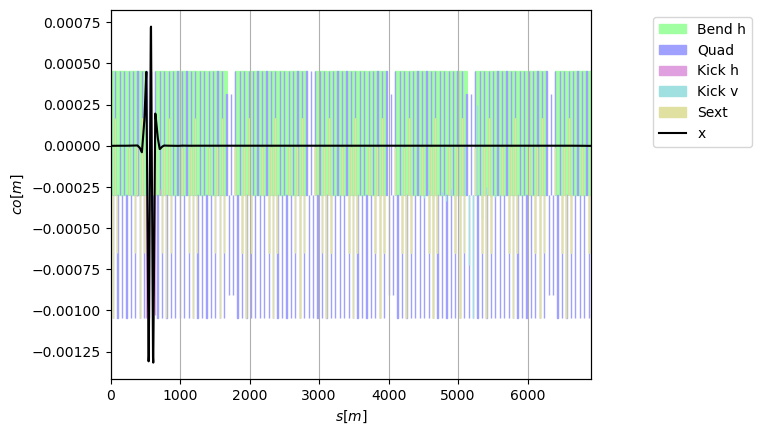

In [116]:
tw.plot('x')

In [130]:
opt = line.match(
    solve=False,
    start='mdh.11007',
    end='mdhw.11732',
    init=tw, 
    vary=[
        xt.VaryList(['bump.11207', 'bump.11407', 'bump.11607'], step=1e-8, tag='bump',)
    ],
    targets = [
        xt.Target('x', -21.5e-3, at='tidp.11434'),
        xt.TargetSet(['x', 'px'], value=tw, at='mdhw.11732')
    ]
    )

In [131]:
opt.run_jacobian(10)

                                             
Optimize - start penalty: 0.2148                            
Matching: model call n. 16 penalty = 1.5108e-15              
Optimize - end penalty:  1.51078e-15                            


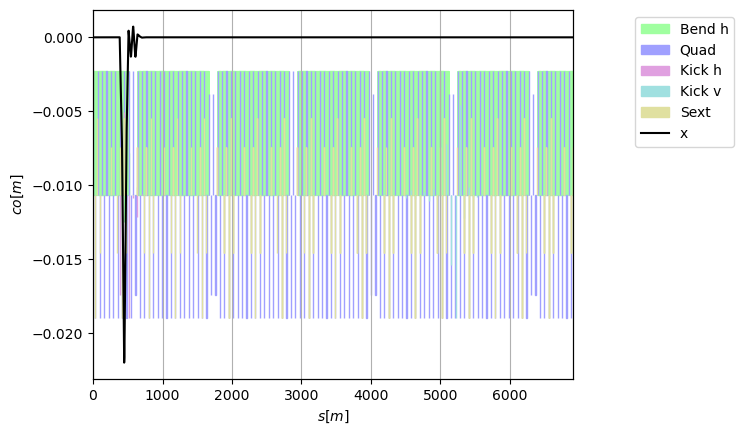

In [132]:
tw_after = line.twiss4d()
tw_after.plot('x')

In [ ]:
tt = line.get_table()

In [129]:
tt.rows['tidp.11434<<2000':'tidp.11434>>1000'].rows['mdh.*|tidp.11434'].show()

name                         s element_type isthick isreplica parent_name iscollective ...
mdh.11007.a_aper       319.333 LimitRect      False     False None               False
mdh.11007              319.457 Multipole      False     False None               False
mdh.11007.b_aper       319.581 LimitRect      False     False None               False
mdh.11207.a_aper       383.328 LimitRect      False     False None               False
mdh.11207              383.452 Multipole      False     False None               False
mdh.11207.b_aper       383.577 LimitRect      False     False None               False
mdh.11407.a_aper       447.323 LimitRect      False     False None               False
mdh.11407              447.448 Multipole      False     False None               False
mdh.11407.b_aper       447.572 LimitRect      False     False None               False
tidp.11434              451.49 Drift           True     False None               False
mdh.11607.a_aper       511.319 LimitRec

In [110]:
tw2 = line.twiss()

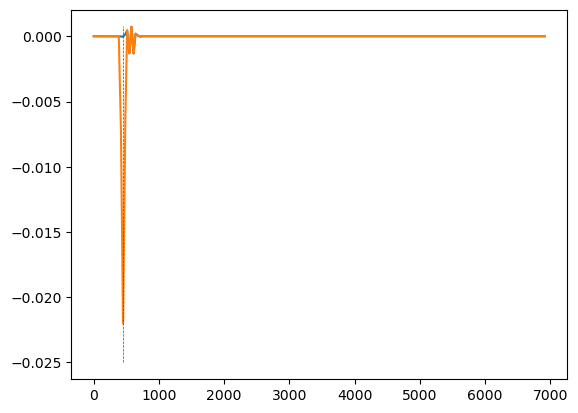

In [133]:
plt.figure()
plt.plot(tw.s, tw.x)
plt.plot(tw_after.s, tw_after.x)
plt.vlines(s_start_tidp, -0.025, 0.00075, color='r', linestyle='--', lw=0.5)
#plt.xlim(s_start_tidp-100, s_start_tidp+200)
#plt.ylim(-0.00015,0.001)